## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [41]:
# Use this cell to begin your analysis, and add as many as you would like!

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

EpData = pd.read_csv('datasets/office_episodes.csv', sep = ',')

print(EpData[0:10])

   episode_number  season      episode_title  \
0               0       1              Pilot   
1               1       1      Diversity Day   
2               2       1        Health Care   
3               3       1       The Alliance   
4               4       1         Basketball   
5               5       1           Hot Girl   
6               6       2        The Dundies   
7               7       2  Sexual Harassment   
8               8       2    Office Olympics   
9               9       2           The Fire   

                                         description  ratings  votes  \
0  The premiere episode introduces the boss and s...      7.5   4936   
1  Michael's off color remark puts a sensitivity ...      8.3   4801   
2  Michael leaves Dwight in charge of picking the...      7.8   4024   
3  Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
4  Michael and his staff challenge the warehouse ...      8.4   4294   
5  Michael is just one of the many male

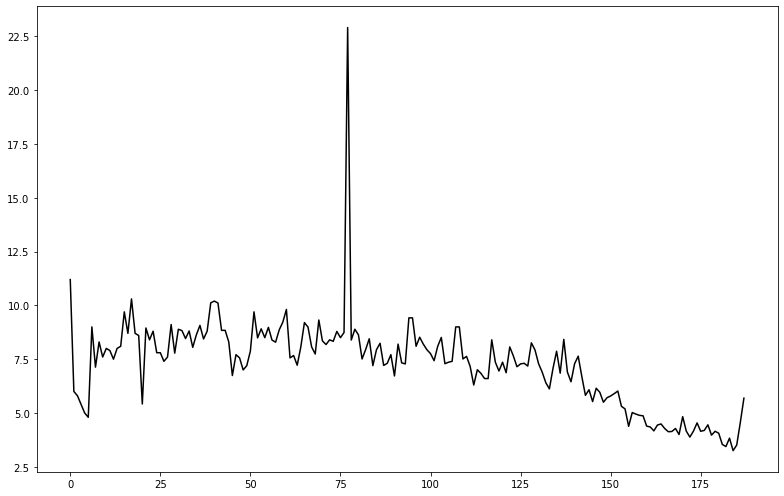

In [42]:
plt.plot(EpData['episode_number'], EpData['viewership_mil'], color = 'black')

plt.show()

0      7.5
1      8.3
2      7.8
3      8.1
4      8.4
      ... 
183    8.0
184    8.0
185    9.0
186    9.5
187    9.8
Name: ratings, Length: 188, dtype: float64
['orange', 'lightgreen', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen']


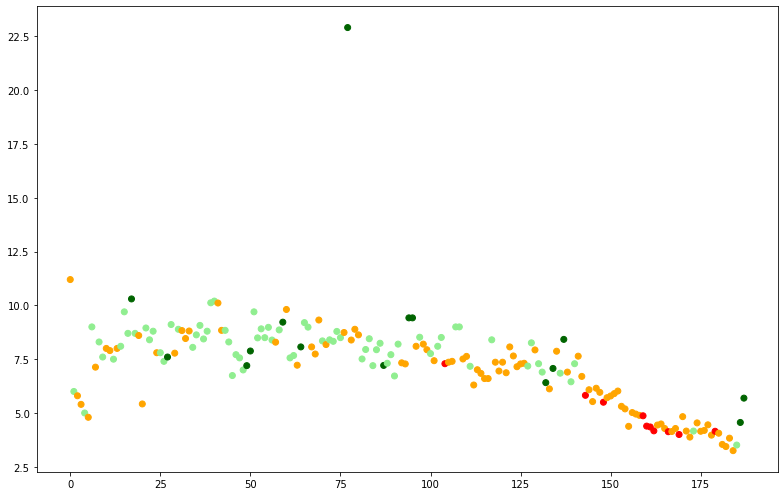

In [43]:
col = []

print(EpData['ratings'])

for x, row in EpData.iterrows():
    if row['scaled_ratings'] < 0.25:
        col.append("red")
    elif 0.25 <= row['scaled_ratings'] < 0.50:
        col.append("orange")
    elif 0.50 <= row['scaled_ratings'] <= 0.75:
        col.append("lightgreen")
    else:
        col.append("darkgreen")

print(col[:10])

plt.scatter(EpData['episode_number'], EpData['viewership_mil'], c = col)



plt.show()

['o', 'o', 'o', 'o', 'o', '*', 'o', 'o', '*', '*']
[25, 25, 25, 25, 25, 250, 25, 25, 250, 250]


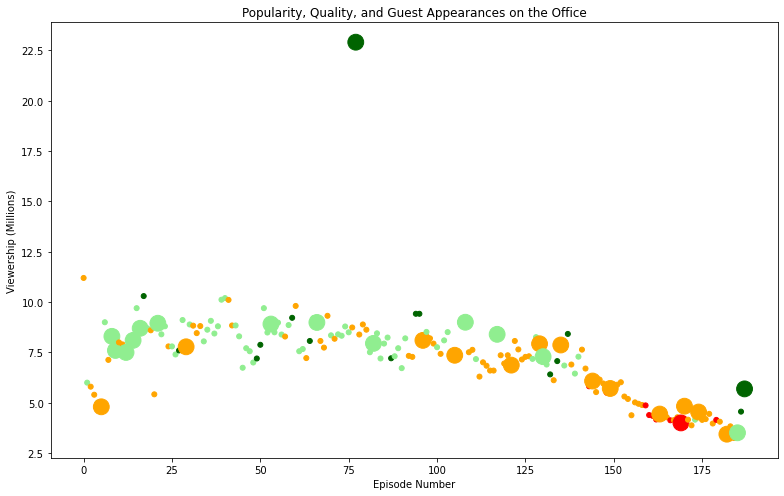

<Figure size 792x504 with 0 Axes>

In [44]:
size = []

symbol = []

for x, row in EpData.iterrows():
    if type(row['guest_stars']) == str:
        size.append(250)
        symbol.append('*')
    else:
        size.append(25)
        symbol.append('o')
        
print(symbol[0:10])
        
print(size[0:10])

plt.scatter(EpData['episode_number'],
            EpData['viewership_mil'], 
            c = col, 
            s = size)

plt.title("Popularity, Quality, and Guest Appearances on the Office")

plt.xlabel("Episode Number")

plt.ylabel("Viewership (Millions)")

fig = plt.figure() 

plt.rcParams['figure.figsize'] = [11, 7]

plt.show()
        

In [45]:
top_star = EpData['guest_stars'][np.argmax(EpData['viewership_mil'])]

print(top_star)



Cloris Leachman, Jack Black, Jessica Alba


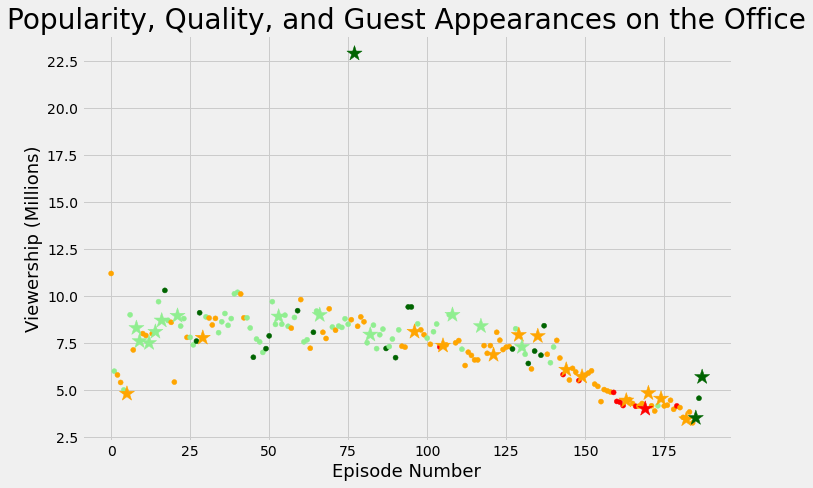

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object


In [46]:
# Import pandas and matplotlib.pyplot
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Read in the csv as a DataFrame
office_df = pd.read_csv('datasets/office_episodes.csv', parse_dates=['release_date'])

# Initiatlize two empty lists
cols = []
sizes = []

# Iterate through the DataFrame, and assign colors based on the rating
for ind, row in office_df.iterrows():
    if row['scaled_ratings'] < 0.25:
        cols.append('red')
    elif row['scaled_ratings'] < 0.50:
        cols.append('orange')
    elif row['scaled_ratings'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')

# Iterate through the DataFrame, and assign a size based on whether it has guests        
for ind, row in office_df.iterrows():
    if row['has_guests'] == False:
        sizes.append(25)
    else:
        sizes.append(250)

# For ease of plotting, add our lists as columns to the DataFrame
office_df['colors'] = cols
office_df['sizes'] = sizes

# Split data into guest and non_guest DataFrames
non_guest_df = office_df[office_df['has_guests'] == False]
guest_df = office_df[office_df['has_guests'] == True]

# Set the figure size and plot style        
plt.rcParams['figure.figsize'] = [11, 7]
plt.style.use('fivethirtyeight')

# Create the figure
fig = plt.figure()

# Create two scatter plots with the episode number on the x axis, and the viewership on the y axis

# Create a normal scatter plot for regular episodes
plt.scatter(x=non_guest_df.episode_number, y=non_guest_df.viewership_mil, \
                 # Assign our color list as the colors and set marker and size
                 c=non_guest_df['colors'], s=25)

# Create a starred scatterplot for guest star episodes
plt.scatter(x=guest_df.episode_number, y=guest_df.viewership_mil, \
                 # Assign our color list as the colors and set marker and size
                 c=guest_df['colors'], marker='*', s=250)

# Create a title
plt.title("Popularity, Quality, and Guest Appearances on the Office", fontsize=28)

# Create an x-axis label
plt.xlabel("Episode Number", fontsize=18)

# Create a y-axis label
plt.ylabel("Viewership (Millions)", fontsize=18)

# Show the plot
plt.show()

# Get the most popular guest star
print(office_df[office_df['viewership_mil'] > 20]['guest_stars'])
top_star = 'Jessica Alba'